# Deep Hedging AI
### Example showing TensorBoard

Hans Buehler, January 2023


In [1]:
""" Slighly annoying: by default the SageMaker Python import directory does not include our git directory """
!pip -q install cdxbasics "tensorflow>=2.10" "tensorflow_probability==0.14"
import os
p = os.getcwd()
dhn = "/deephedging/"
i = p.find(dhn)
if i!=-1:
    p = p[:i]
    import sys
    sys.path.append(p)
    print("SageMaker: added python path %s" % p)

SageMaker: added python path /home/ec2-user/SageMaker


Deep Hedging AI says hello ... 

2023-01-19 23:28:10.096543: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-19 23:28:10.260427: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Tensorflow version 2.10.0 running on 1 CPUs and 0 GPUs


2023-01-19 23:28:12.215903: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-19 23:28:12.215961: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-16-12-144.eu-west-2.compute.internal): /proc/driver/nvidia/version does not exist
2023-01-19 23:28:13.087019: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Gym with 943 trainable weights compiled and initialized. Took 2s
Network feature information:
 Features used by the agent:        delta, price and time_left
 Features available to the agent:   action, cost, delta, ivol, lbnd_a, pnl, price, spot, sqrt_time_left, time_left and ubnd_a
 Features used by the utility:      -
 Features available to the utility: cost, ivol, lbnd_a, price, spot, sqrt_time_left, time_left and ubnd_a
Training monitor initialized. Took 0s
TensorBoard log directory set to '/home/ec2-user/.tensorboard/'. Took 0s


2023-01-19 23:28:15.765773: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-01-19 23:28:15.765807: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-01-19 23:28:15.927417: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.


Deep Hedging Engine: first of 10 epochs for training 943 weights over 1000 samples with 1000 validation samples started. This training run took 0s so far. Now compiling graph ...       

2023-01-19 23:28:19.754100: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-01-19 23:28:19.754132: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-01-19 23:28:19.778961: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2023-01-19 23:28:19.797443: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-01-19 23:28:19.829590: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: /home/ec2-user/.tensorboard/plugins/profile/2023_01_19_23_28_19

2023-01-19 23:28:19.859714: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to /home/ec2-user/.tensorboard/plugins/profile/2023_01_19_23_28_19/ip-172-16-12-144.eu-west-2.compute.internal.trace.json.gz
2023-01-19 23:28:19.885535: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: /home/ec2-us

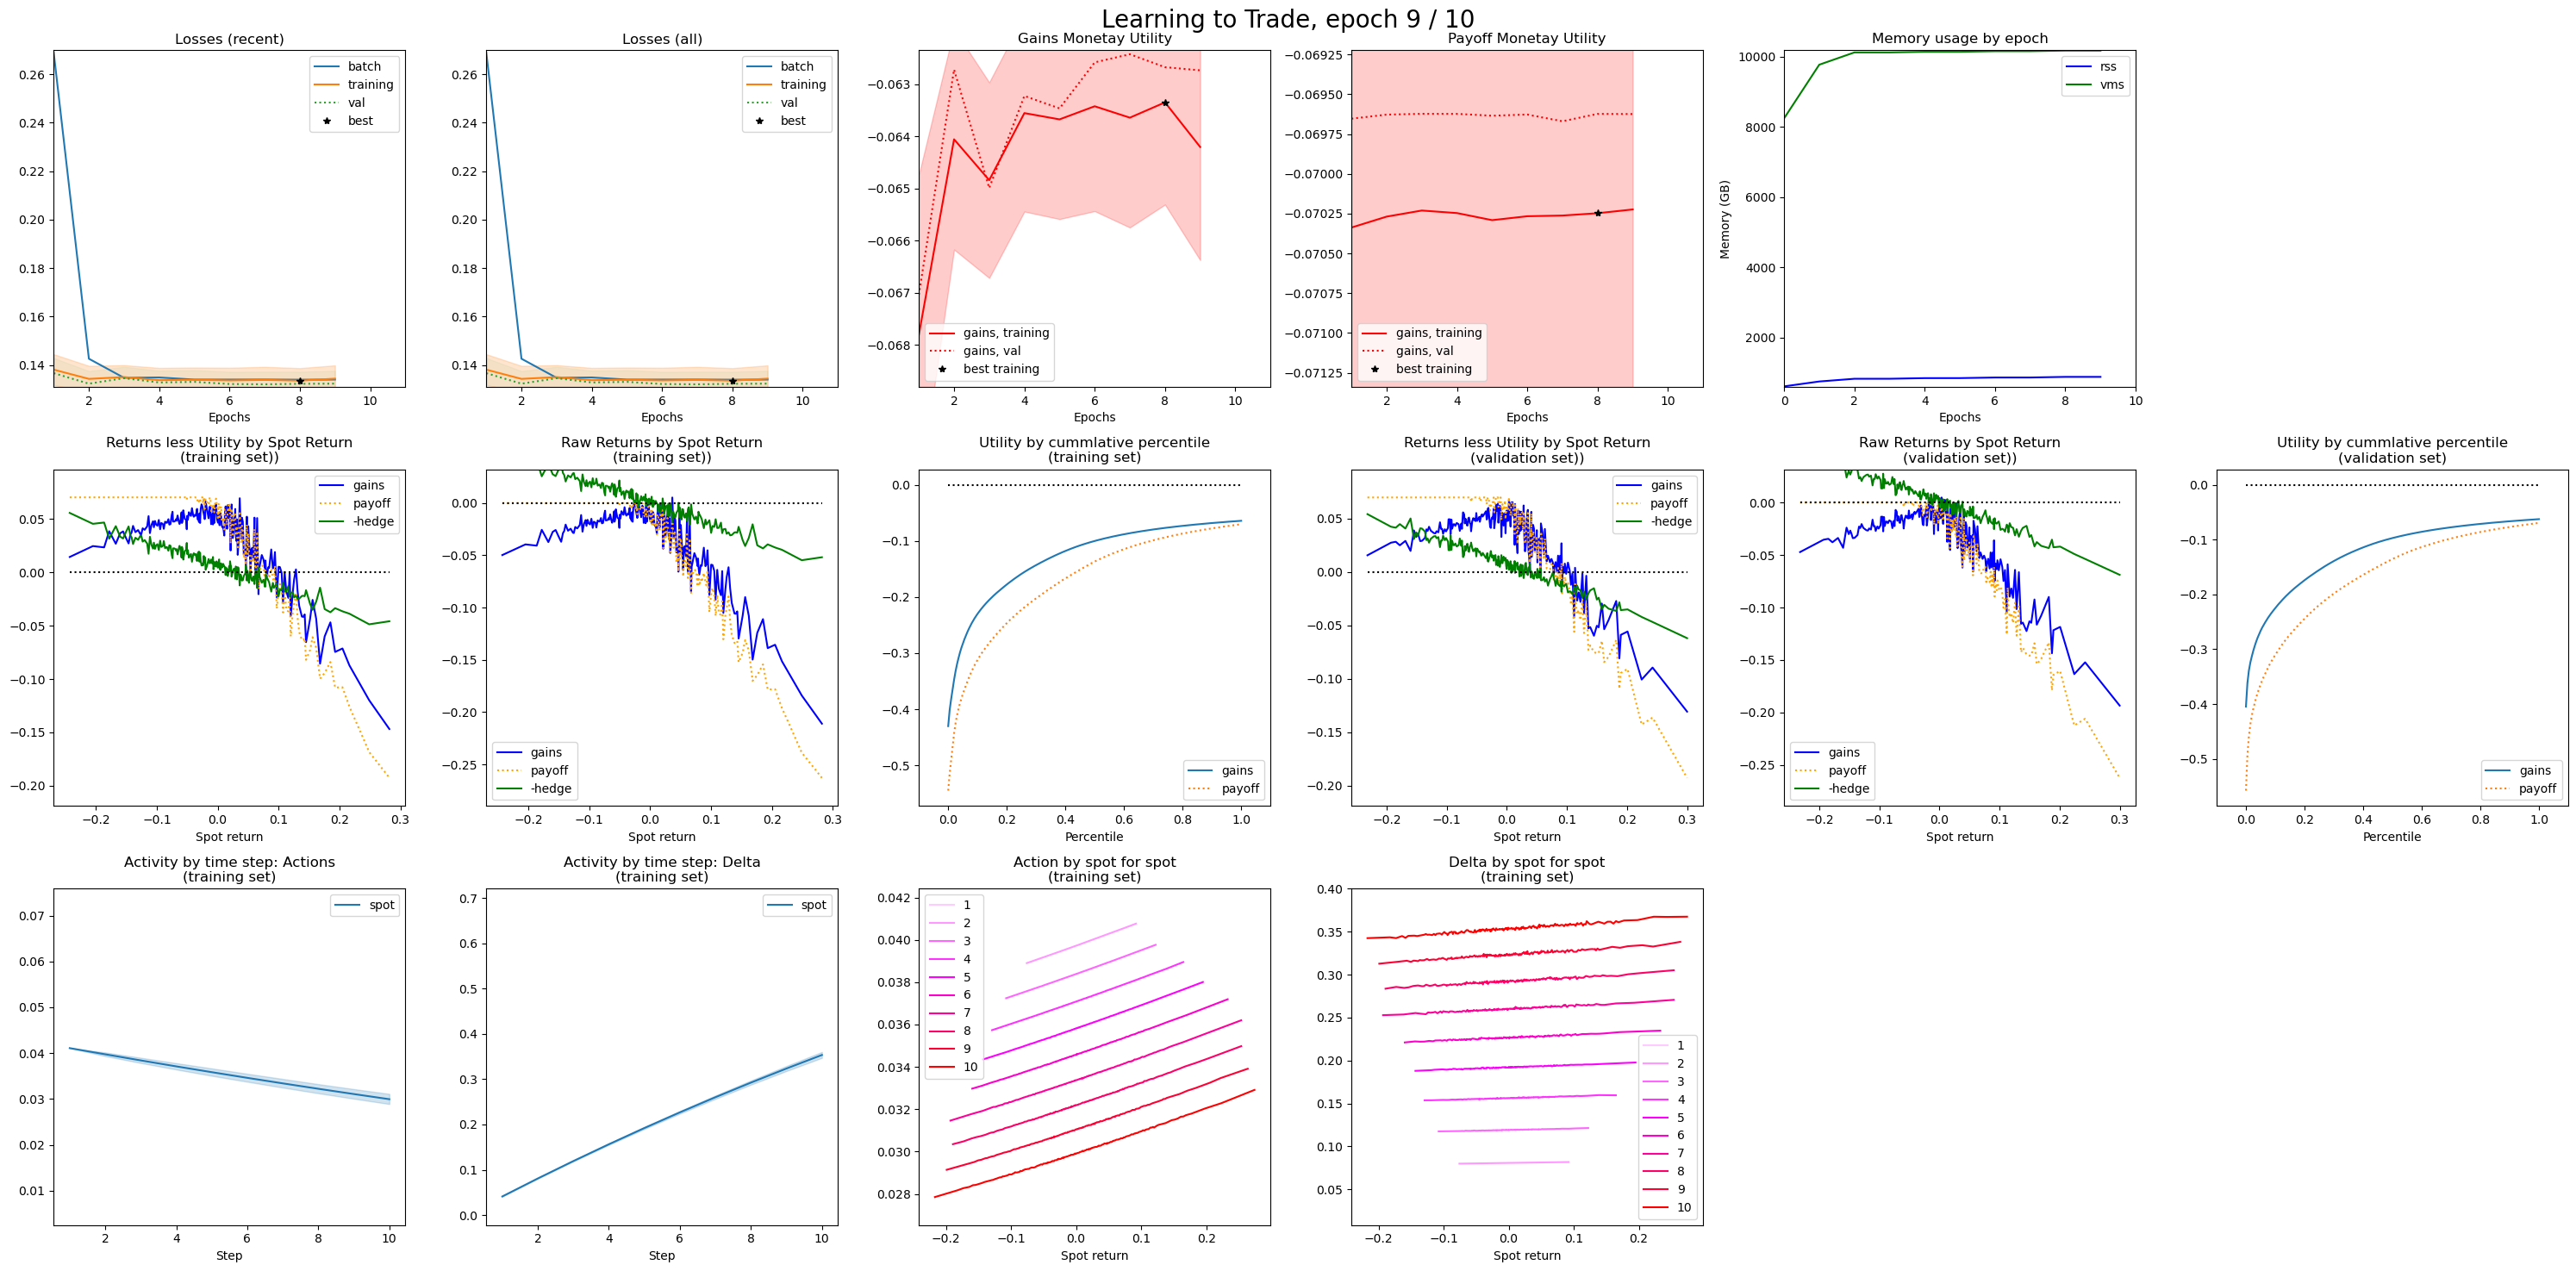

Training 10/10 epochs; 943 weights; 1000 samples; 1000 validation samples batch size 32 | initial loss 0.388004 (0.0178473), training 0.133543 (0.00521973), best 0.133543 (0.0178473), batch 0.13392, val 0.13228 (0.00503019). Best epoch 9. | memory used: rss 875.918M, vms 10172.8M | time elapsed 8s; time per epoch 0s; estimated time remaining 8s                          
 Status: Training complete.
 Weights set to best epoch: 9

Training terminated. Total time taken 23s


In [2]:
print("Deep Hedging AI says hello ... ", end='')
from cdxbasics.config import Config
from cdxbasics.subdir import SubDir
from deephedging.trainer import train
from deephedging.gym import VanillaDeepHedgingGym
from deephedging.world import SimpleWorld_Spot_ATM

from IPython.display import display, Markdown

# see print of the config below for numerous options
config = Config()
# world
config.world.samples = 1000
config.world.steps = 10
config.world.black_scholes = True
# gym
config.gym.objective.utility = "cvar"
config.gym.objective.lmbda = 1.
config.gym.agent.network.depth = 3
config.gym.agent.network.depth = 3
config.gym.agent.network.activation = "softplus"
# trainer
config.trainer.train.batch_size = None
config.trainer.train.epochs = 10
board_dir = SubDir("~/.tensorboard").path
config.trainer.train.tensor_board.log_dir = board_dir
config.trainer.train.tensor_board.hist_freq = 1
config.trainer.train.tensor_board.profile_batch  = 2
config.trainer.caching.mode = "off"
config.trainer.visual.epoch_refresh = 2
config.trainer.visual.confidence_pcnt_lo = 0.25
config.trainer.visual.confidence_pcnt_hi = 0.75

# create world
world  = SimpleWorld_Spot_ATM( config.world )
val_world  = world.clone(samples=1000)

# create training environment
gym = VanillaDeepHedgingGym( config.gym )

# create training environment
train( gym=gym, world=world, val_world=val_world, config=config.trainer )
config.done()



### TensorBoard

In [3]:
# Load the TensorBoard notebook extension.
%reload_ext tensorboard
# Launch TensorBoard and navigate to the Profile tab to view performance profile

%tensorboard --logdir=board_dir

